# Artificial Intelligence

**ChatGPT's answer:** Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and act like humans. It encompasses a wide range of technologies and techniques, including machine learning, natural language processing, computer vision, and robotics, among others. The goal of AI is to create machines that can perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation.

Supervised Learning, Unsupervised Learning, and Reinforcement Learning are three types of Machine Learning. We will not cover Reinforcement Learning in this class.

##### Discussion: Binary Search Algorithm.

I need one audience to play a game with me. Please come up with a random integer number from 1 to 100. I will guess your number in 10 questions. If I can't, you will get an A in this class and without doing homework 3 and 4.

In [5]:
### Let's code this game together in Python 36
low = 0
high = 100

while low <= high:
    mid = (low + high) // 2
    print(f"Is the number {mid}?")
    user_input = input("Enter 'l' for too low, 'h' for too high, or 'c' for correct: ")

    if user_input == 'c':
        print(f"Great! The number was {mid}.")
        break
    elif user_input == 'l':
        low = mid + 1
    elif user_input == 'h':
        high = mid - 1
    else:
        print("Invalid input. Please enter 'l', 'h', or 'c'.")

Is the number 50?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  h


Is the number 24?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  l


Is the number 37?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  h


Is the number 30?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  l


Is the number 33?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  l


Is the number 35?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  l


Is the number 36?


Enter 'l' for too low, 'h' for too high, or 'c' for correct:  c


Great! The number was 36.


This problem is rigged. $2^8 = 128$ 

Math ensures that you will get the correct number by using this algorithm. 

### Intelligent Computing: Genetic Algorithms

Similar to Gradient Decent Algorithms, the Genetic algorithms are heuristic optimization algorithms but GA is inspired by the process of natural selection. They are used to find solutions to complex optimization and search problems.

Here is the pseudo code to GA:

1. Initialization: Generate an initial population of solutions randomly.
2. Evaluation: Evaluate the fitness of each solution in the population.
3. Selection: Select the best-fit individuals for reproduction (parents) based on their fitness.
4. Crossover: Create new individuals (offspring) by combining the genetic material of the parents.
5. Mutation: Introduce random changes (mutation) to the offspring's genetic material.
6. Replacement: Replace the current population with the new population of offspring.
7. Termination: Repeat steps 2-6 until a termination condition is met (e.g., a maximum number of generations or reaching a satisfactory solution).

Imagine the wild life in Africa： Panthera Leo(Lions)

1. All lions in a region is the initial population
2. The male will fight for the territory
3. The strongest winnder： Simba
4. Simba can reproduce his gene with the female lions. 
5. Some uncommon and unexpected DNA forms during they exchange the reproduce. 
6. The weak will be dead by nature.
7. The above process is rolling and never ends. 

The process itself is a optimization process. 

And similar things also happened to the small species, Ant! Ant Colony Algorithm was develop to simulate the foraging behavior of real ants. 
I will show you a video for how ants find the best/shortest path from the nest to the food. 

### Perceptron Algorithm
The Perceptron algorithm is a fundamental supervised learning algorithm for binary classification. It's one of the simplest types of artificial neural networks and was developed in the 1950s by Frank Rosenblatt. The Perceptron algorithm classifies data by finding a linear decision boundary that separates two classes. It's often seen as the building block for more complex neural networks.

\begin{align}
    & Output = f(W_n * X_n + b)
\end{align}

x is the input feature vector,<br>
w is the weight vector (one weight for each feature)<br>
b is the bias term<br>
f is an activation function, typically the sign function for the Perceptron, which outputs +1 if the result is positive and −1 if negative.<br>
The goal of the Perceptron algorithm is to find the optimal values for w and b that classify the training data accurately.

Final weights: [ 0.4244044  -0.27352476]
Final bias: 0.20000000000000004
Test accuracy: 100.00%


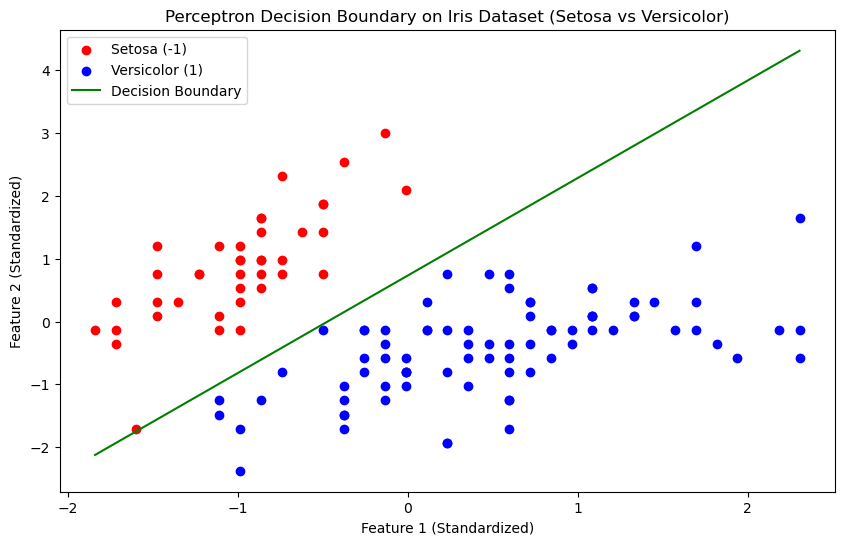

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first 100 samples (Setosa and Versicolor) and the first two features
y = iris.target[:]    # Target labels for Setosa (0) and Versicolor (1)

# Convert target labels to -1 and 1 (since Perceptron expects -1 and 1)
y = np.where(y == 0, -1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perceptron algorithm
weights = np.zeros(X_train.shape[1])  # Initialize weights
bias = 0
learning_rate = 0.1
epochs = 10

# Training the perceptron
for epoch in range(epochs):
    for i, x in enumerate(X_train):
        # Make a prediction
        linear_output = np.dot(x, weights) + bias
        prediction = np.sign(linear_output)

        # Update weights and bias if prediction is incorrect
        if prediction != y_train[i]:
            weights += learning_rate * y_train[i] * x
            bias += learning_rate * y_train[i]

# Testing the perceptron
print("Final weights:", weights)
print("Final bias:", bias)

# Prediction on test set
predictions = np.sign(np.dot(X_test, weights) + bias)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='red', label="Setosa (-1)")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label="Versicolor (1)")

# Plot the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, label="Decision Boundary", color="green")

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.title("Perceptron Decision Boundary on Iris Dataset (Setosa vs Versicolor)")
plt.show()


### Optimization：find the best model parameters
### 
\begin{align}
\frac{\partial L}{\partial w} = -y_{i}x_{i},\\
\frac{\partial L}{\partial b} = -y_{i}
\end{align}
### Update Rules
Use a learning rate $\eta$ to adjust weights:
\begin{align}
w = w - \eta \frac{\partial L}{\partial w}
\end{align}

### Loss function
A loss function (or cost function) is a mathematical function used in machine learning and optimization to measure how well a model’s predictions match the true data. It quantifies the "error" or "difference" between the predicted values and the actual values, allowing the algorithm to understand how far off it is from the target.
Mean Squared Error (MSE):
\begin{align}
MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{align}

Test accuracy: 100.00%
Final weights: [ 0.61037855 -0.51730994]
Final bias: 0.3333333327723423


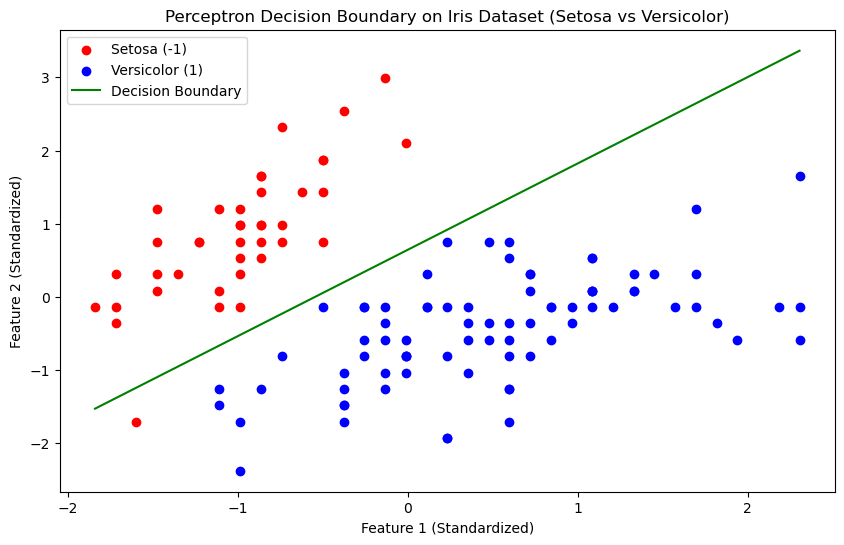

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (only two classes: Setosa and Versicolor)
iris = load_iris()
X = iris.data[:, :2]  # Use the first two features for simplicity
y = iris.target[:]
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    # Calculate predictions
    predictions = np.dot(X_train, weights) + bias
    
    # Compute the errors
    errors = y_train - predictions
    
    # Calculate gradients
    weight_gradient = -2 * np.dot(X_train.T, errors) / len(X_train)
    bias_gradient = -2 * np.sum(errors) / len(X_train)
    
    # Update weights and bias
    weights -= learning_rate * weight_gradient
    bias -= learning_rate * bias_gradient

# Testing the model
test_predictions = np.sign(np.dot(X_test, weights) + bias)
accuracy = np.mean(test_predictions == y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print("Final weights:", weights)
print("Final bias:", bias)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='red', label="Setosa (-1)")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label="Versicolor (1)")

# Plot the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, label="Decision Boundary", color="green")

plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.title("Perceptron Decision Boundary on Iris Dataset (Setosa vs Versicolor)")
plt.show()

### Question: The prediction accuracy is 100%. Why there is a red dot below the decision boundry?

### Question: How is this related to Neural Network?

### Discussion: Any business application on this?

C:\Users\ZXT3080\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ZXT3080\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1]
Figure below is the clustered result.


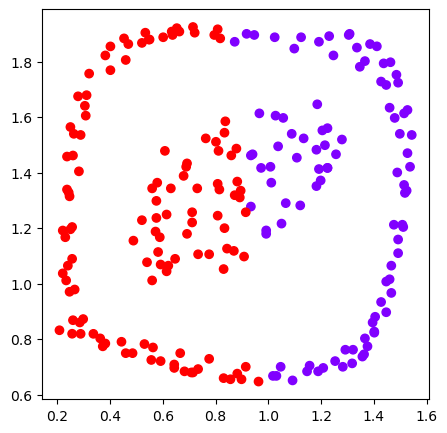

In [2]:
### this is an example of cluster algorithm
### we will cover this topic later this semester
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

def loadDataSet():
    a = []
    f = open("../../data/B.txt",'r')
    lines = f.readlines()   #make lines a list, has index inside already
    f.close()
    for line in lines:
        b = ['', '']
        b[0],b[1] = line.split()
        a.append(b)
    dataSet = np.array(a,dtype=float)   
    return dataSet

X = loadDataSet()

#cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'single')  
cluster = KMeans(n_clusters = 2)  
cluster.fit_predict(X)
print(cluster.labels_)  
print("Figure below is the clustered result.")

labels = range(0, 2)  
plt.figure(figsize = (5, 5))  
plt.subplots_adjust(bottom = 0.1)  
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap ='rainbow')
plt.show()

K-means is sensitive to the initial selection of centroids and may converge to a local minimum, so it is common to run the algorithm multiple times with different initializations and choose the clustering with the lowest overall error.

K-means is widely used for clustering tasks in various fields, such as customer segmentation, image segmentation, and anomaly detection.

[0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1]
Figure below is the clustered result.


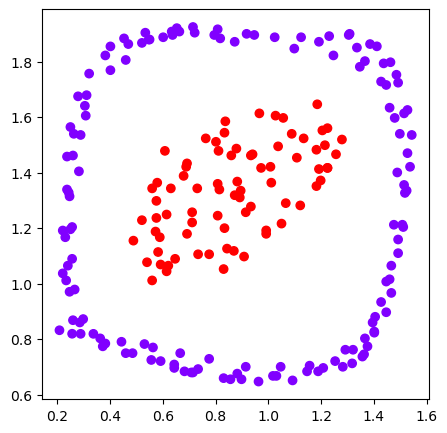

In [9]:
### this is an example of cluster algorithm
### we will cover this topic later this semester
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

def loadDataSet():
    a = []
    f = open("../../data/B.txt",'r')
    lines = f.readlines()   #make lines a list, has index inside already
    f.close()
    for line in lines:
        b = ['', '']
        b[0],b[1] = line.split()
        a.append(b)
    dataSet = np.array(a,dtype=float)   
    return dataSet

X = loadDataSet()

cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'single')   
cluster.fit_predict(X)
print(cluster.labels_)  
print("Figure below is the clustered result.")

labels = range(0, 2)  
plt.figure(figsize = (5, 5))  
plt.subplots_adjust(bottom = 0.1)  
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap ='rainbow')
plt.show()

Accuracy is:  0.9064327485380117


C:\Users\yjyzx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yjyzx\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<AxesSubplot:>

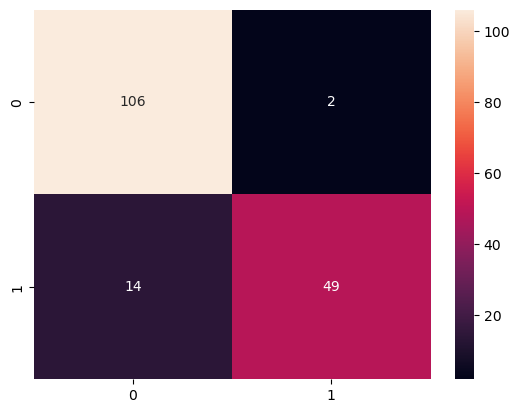

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

data = pd.read_csv('../../data/Cancer_data.csv')
# head method show only first 5 rows
data.head()

y = data.diagnosis

# drop some unnecessary columns
drop_list1 = ['Unnamed: 32', 'id', 'diagnosis', 'perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = data.drop(drop_list1, axis = 1)        # do not modify x, we will use it later 
x_1.head()

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size = 0.3, random_state = 42)

#K Nearest Neighbors Classifier with k = 11 
clf_rf = KNeighborsClassifier(n_neighbors = 11)      
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

The KNN algorithm is considered a simple and intuitive method for classification and regression tasks. It does not require a training phase and makes predictions based on the similarity of data points in the feature space. However, it can be computationally expensive for large datasets, as it requires calculating distances between the new data point and all existing data points.

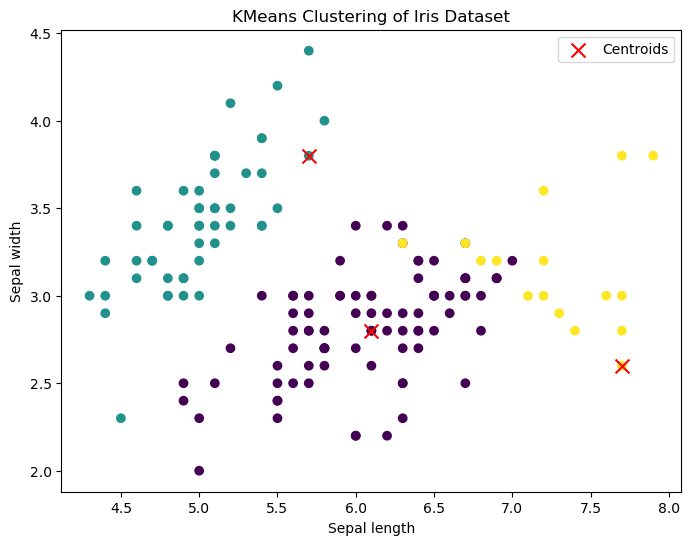

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Number of clusters
k = 3

# Number of data points
m = X.shape[0]

# Initialize centroids randomly
np.random.seed(42)
centroids_idx = np.random.choice(m, k, replace=False)
centroids = X[centroids_idx]

# Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

clusters = assign_clusters(X, centroids)

# Update centroids
def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids

# Perform KMeans clustering
max_iter = 100
for _ in range(max_iter):
    prev_clusters = clusters
    clusters = assign_clusters(X, centroids)
    if np.array_equal(clusters, prev_clusters):
        break
    centroids = update_centroids(X, clusters, k)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()

In [2]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5296268965076593


The silhouette score ranges from -1 to 1, where a higher value indicates better clustering.